# **Aerofit Project**




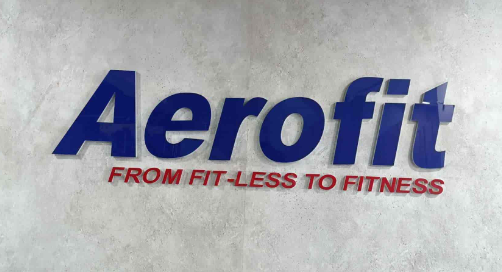

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("aerofit_treadmill.csv?1639992749")
df.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
5,KP281,20,Female,14,Partnered,3,3,32973,66
6,KP281,21,Female,14,Partnered,3,3,35247,75
7,KP281,21,Male,13,Single,3,3,32973,85
8,KP281,21,Male,15,Single,5,4,35247,141
9,KP281,21,Female,15,Partnered,2,3,37521,85


## **Checking the structure & characteristics of the dataset**

In [ ]:
df.isnull().sum()  # Surprisingly there are no missing values present good to go

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [ ]:
df.info()     ## There are 6 interger and 3 object data type variables or features given in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
df = df.astype({"Gender":'category', "MaritalStatus":'category'}) ## Converted object datatype to category as it is a category data given.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    object  
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(2), int64(6), object(1)
memory usage: 10.6+ KB


In [ ]:
df.shape

(180, 9)

In [ ]:
Product_cost=[]   ## Dataset witn new column Product_cost is created.
for name in df["Product"]:
  if name == "KP281" : Product_cost.append(1500)
  elif name == "KP481" : Product_cost.append(1750)
  elif name == "KP781" : Product_cost.append(2500)
df["Product_cost"]=Product_cost
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Product_cost
0,KP281,18,Male,14,Single,3,4,29562,112,1500
1,KP281,19,Male,15,Single,2,3,31836,75,1500
2,KP281,19,Female,14,Partnered,4,3,30699,66,1500
3,KP281,19,Male,12,Single,3,3,32973,85,1500
4,KP281,20,Male,13,Partnered,4,2,35247,47,1500


In [ ]:
## Checking for the correlations
df.corr()

,Age,Education,Usage,Fitness,Income,Miles,Product_cost
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618,0.029263
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284,0.563463
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130,0.623124
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702,0.696616
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473,0.695847
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000,0.643923
Product_cost,0.029263,0.563463,0.623124,0.696616,0.695847,0.643923,1.000000


In [ ]:
df.corr()*100 ##

,Age,Education,Usage,Fitness,Income,Miles,Product_cost
Age,100.000000,28.049567,1.506447,6.110454,51.341369,3.661757,2.926320
Education,28.049567,100.000000,39.515522,41.058079,62.582735,30.728428,56.346290
Usage,1.506447,39.515522,100.000000,66.860557,51.953723,75.913048,62.312415
Fitness,6.110454,41.058079,66.860557,100.000000,53.500532,78.570174,69.661650
Income,51.341369,62.582735,51.953723,53.500532,100.000000,54.347326,69.584691
Miles,3.661757,30.728428,75.913048,78.570174,54.347326,100.000000,64.392330
Product_cost,2.926320,56.346290,62.312415,69.661650,69.584691,64.392330,100.000000


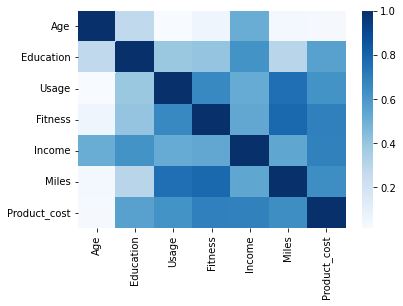

In [ ]:
sns.heatmap(df.corr(),cmap="Blues")

## **Cheking Unique Values and Value counts**

In [ ]:
df["Product"].unique() # Only three types of tredmills product information is given

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [ ]:
df["Age"].unique() # Maximum unique age limit is 50 and minimum is 18.

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42])

In [ ]:
df["Gender"].unique() # No entry given for third gender customers

['Male', 'Female']
Categories (2, object): ['Female', 'Male']

In [ ]:
df["Education"].unique().mean() # Average education year is 16 years

16.125

In [ ]:
df["MaritalStatus"].unique()

['Single', 'Partnered']
Categories (2, object): ['Partnered', 'Single']

In [ ]:
df["Usage"].unique() #The average number of times the customer plans to use the treadmill each week.

array([3, 2, 4, 5, 6, 7])

In [ ]:
df["Fitness"].unique()

array([4, 3, 2, 1, 5])

In [ ]:
df["Income"].unique()

array([ 29562,  31836,  30699,  32973,  35247,  37521,  36384,  38658,
        40932,  34110,  39795,  42069,  44343,  45480,  46617,  48891,
        53439,  43206,  52302,  51165,  50028,  54576,  68220,  55713,
        60261,  67083,  56850,  59124,  61398,  57987,  64809,  47754,
        65220,  62535,  48658,  54781,  48556,  58516,  53536,  61006,
        57271,  52291,  49801,  62251,  64741,  70966,  75946,  74701,
        69721,  83416,  88396,  90886,  92131,  77191,  52290,  85906,
       103336,  99601,  89641,  95866, 104581,  95508])

In [ ]:
df["Miles"].unique() #The average number of miles the customer expects to walk/run each week

array([112,  75,  66,  85,  47, 141, 103,  94, 113,  38, 188,  56, 132,
       169,  64,  53, 106,  95, 212,  42, 127,  74, 170,  21, 120, 200,
       140, 100,  80, 160, 180, 240, 150, 300, 280, 260, 360])

In [ ]:
df.describe(include=["object","category"]) #Maximum selling product is "KP281".
                                           #maximum male intrested to buy.
                                           #maximum customers are partnered

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


In [ ]:
df["Product"].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [ ]:
df["Gender"].value_counts() # more then 50% male intrested as compaire to female

Male      104
Female     76
Name: Gender, dtype: int64

In [ ]:
df["Education"].value_counts() # Maximum educated years are 16

16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

In [ ]:
df["Usage"].value_counts() #The average number of times the customer plans to use
                           #the treadmill each week maximum is 3 times/week

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

In [ ]:
df["Fitness"].value_counts() #Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape
                             #and 5 is the excellent shape. maximum customer rated as "3"

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

In [ ]:
df["Miles"].value_counts(bins=10) #	The average number of miles the customer expects to
                                  #walk/run each week maximum customer is 85 miles/run

(54.9, 88.8]      63
(88.8, 122.7]     51
(20.66, 54.9]     24
(156.6, 190.5]    16
(122.7, 156.6]    14
(190.5, 224.4]     7
(258.3, 292.2]     2
(224.4, 258.3]     1
(292.2, 326.1]     1
(326.1, 360.0]     1
Name: Miles, dtype: int64

In [ ]:
df.describe() ## Except Income and Miles other parameters are linearly distributated.

,Age,Education,Usage,Fitness,Income,Miles,Product_cost
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444,1805.555556
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605,387.978895
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000,1500.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000,1500.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000,1750.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000,1750.000000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000,2500.000000


## **Detected Outliers And Removing it from dataframe**

In [ ]:
#The difference between mean and median is much heigher in Income columns hence finding out the outlier
#by using IQR technique and removing it.
Q1=df.Income.quantile(0.25)
Q3=df.Income.quantile(0.75)
IQR=Q3-Q1
IQR

14609.25

In [ ]:
lower_limit=Q1 - 1.5*IQR
Upper_limit=Q3 + 1.5*IQR
lower_limit,Upper_limit

(22144.875, 80581.875)

In [ ]:
df[(df.Income<lower_limit) | (df.Income>Upper_limit)] # These are all the outlier of Income columns

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Product_cost
159,KP781,27,Male,16,Partnered,4,5,83416,160,2500
160,KP781,27,Male,18,Single,4,3,88396,100,2500
161,KP781,27,Male,21,Partnered,4,4,90886,100,2500
162,KP781,28,Female,18,Partnered,6,5,92131,180,2500
164,KP781,28,Male,18,Single,6,5,88396,150,2500
166,KP781,29,Male,14,Partnered,7,5,85906,300,2500
167,KP781,30,Female,16,Partnered,6,5,90886,280,2500
168,KP781,30,Male,18,Partnered,5,4,103336,160,2500
169,KP781,30,Male,18,Partnered,5,5,99601,150,2500
170,KP781,31,Male,16,Partnered,6,5,89641,260,2500


In [ ]:
## Let's remove the outlier from Income column
df[(df.Income>lower_limit) & (df.Income<Upper_limit)]
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Product_cost
0,KP281,18,Male,14,Single,3,4,29562,112,1500
1,KP281,19,Male,15,Single,2,3,31836,75,1500
2,KP281,19,Female,14,Partnered,4,3,30699,66,1500
3,KP281,19,Male,12,Single,3,3,32973,85,1500
4,KP281,20,Male,13,Partnered,4,2,35247,47,1500


In [ ]:
## Let's remove the outlier from Miles column
Q1=df.Miles.quantile(0.25)
Q3=df.Miles.quantile(0.75)
IQR=Q3-Q1
IQR
lower_limit=Q1 - 1.5*IQR
Upper_limit=Q3 + 1.5*IQR
df[(df.Miles>lower_limit) & (df.Miles<Upper_limit)]
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Product_cost
0,KP281,18,Male,14,Single,3,4,29562,112,1500
1,KP281,19,Male,15,Single,2,3,31836,75,1500
2,KP281,19,Female,14,Partnered,4,3,30699,66,1500
3,KP281,19,Male,12,Single,3,3,32973,85,1500
4,KP281,20,Male,13,Partnered,4,2,35247,47,1500


## **Check the features with visualisation**

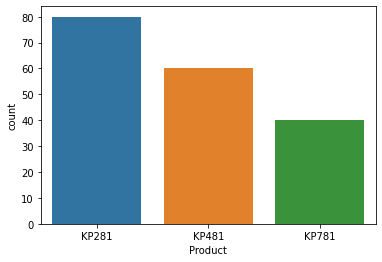

In [ ]:
sns.countplot(x="Product", data=df)
plt.show()
## The KP281 is an entry-level treadmill that sells for $1,500. (Blue color 1st heighest seller product)
## The KP481 is for mid-level runners that sell for $1,750. (orange color 2nd hightest seller product)
## The KP781 treadmill is having advanced features that sell for $2,500. (green color lower in sell as the cost is height)
## As the cost increasing selles decreasing for that high cost product

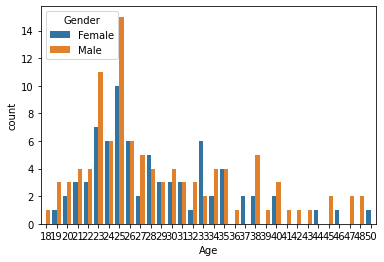

In [ ]:
sns.countplot(x="Age",hue="Gender",data=df) ## Maximum male used product than female
                                            ## 19-40 age range are females customers
                                            ## 23-38 age range are male customers
plt.show()

[]

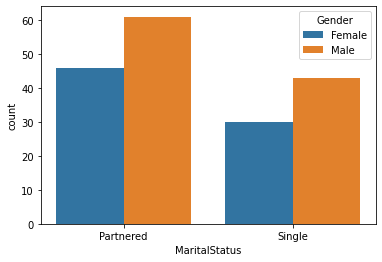

In [ ]:
sns.countplot(x="MaritalStatus",hue="Gender",data=df) #In both category i.e. Partnered and Single maximum count is for male.
plt.plot()                                            #aerofit need to focus on increase the female count also.

[]

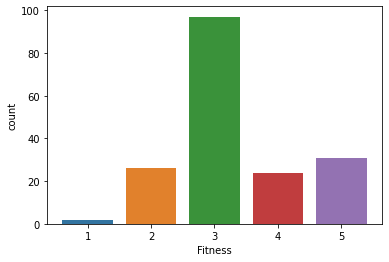

In [ ]:
sns.countplot(x="Fitness",data=df)   #Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
plt.plot()                           #Here most of customer gave "3" as a fitness rating which is normal.

[]

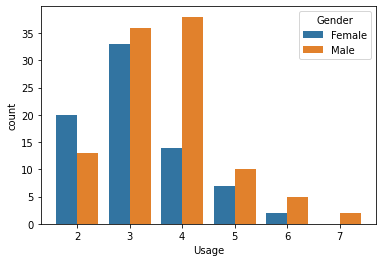

In [ ]:
sns.countplot(x="Usage",hue="Gender",data=df) ## maximum male use 4 times per week
plt.plot()                                    ## maximum female use 3 times per week
                                              ## only male use 7 times per week

[]

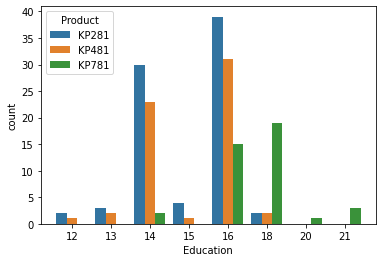

In [ ]:
sns.countplot(x="Education",hue="Product",data=df) # Maximum customer educated for 16 years and KP281 buyer is more
plt.plot()                                         #Customer those are educated more than 16 years prefer to buy KP781 the costly product

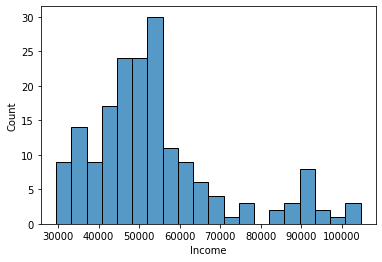

In [ ]:
sns.histplot(data=df["Income"],bins=20) ## Maximum Anual Income lie in between the range 45,000 to 55,000 (in $)
plt.show()

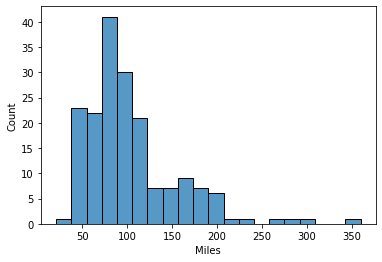

In [ ]:
sns.histplot(data=df["Miles"],bins=20) #The maximum average number of miles the customer expects
plt.show()                              #to walk/run each week is lie between 45 - 120 miles.

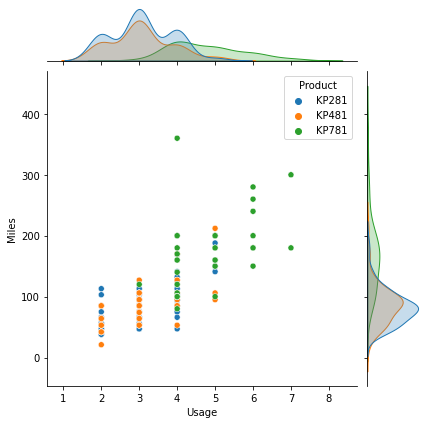

In [ ]:
sns.jointplot(x="Usage",y="Miles",data=df,hue="Product") # KP781 usage is at 4 and miles range 50-390 miles approx
                                                         # Plot gives us usage of different product for perticular miles range.

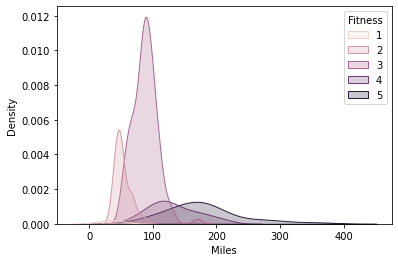

In [ ]:
sns.kdeplot(x="Miles",data=df,hue="Fitness",color='green',shade=True) # highest rating is 3 for all kind of tredmills.

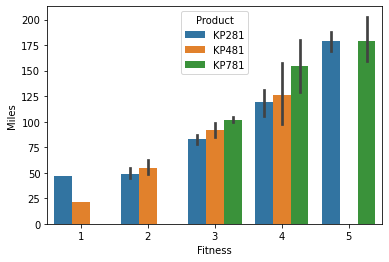

In [ ]:
City_Category
# This graph gives us the different rating for the different product according to the average number of miles.
# KP781 is having highest rating and KP281 has all types of ratings.

## **Check correlation among different factors using heat maps**

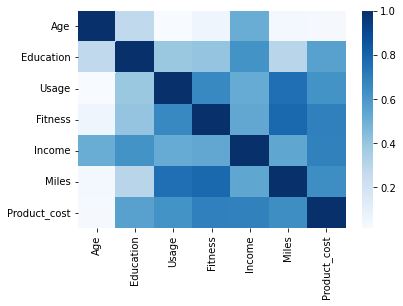

In [ ]:
sns.heatmap(df.corr(),cmap="Blues")
## Age is very less corellated with Usage,Fitness,Miles and product_cost, Age is strongly correlated with Income
## Education strongly corellated with Income. As no. of education years increase the income will also increase and viceversa
## Usage per week given which is strongly correlated with Fitness ans Miles
## Fitness strongly correlated with Miles
## Miles is corellated with Education,Usage,Fitness and Income

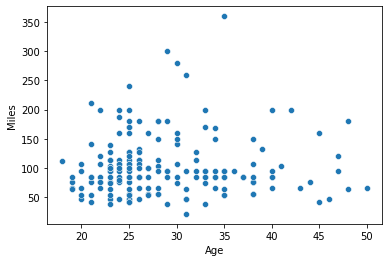

In [ ]:
sns.scatterplot(df["Age"],df["Miles"]) #Age and Miles are not correlated with each other no effect of Age
                                       #on miles walk/run each week.

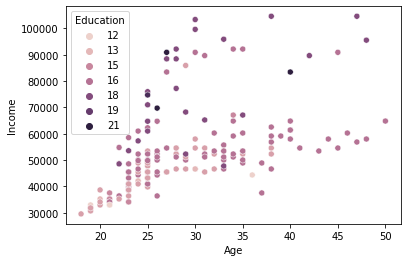

In [ ]:
sns.scatterplot(df["Age"],df["Income"],df["Education"]) ## Age and education both are positively correllated with Income.

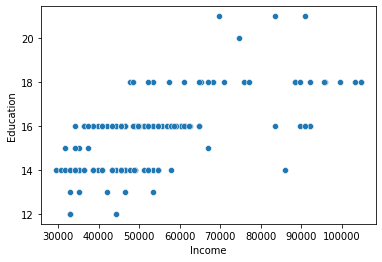

In [ ]:
sns.scatterplot(df["Income"],df["Education"]) #Both are positively correlated with each other as no.of years of education increases
                                              #the age the education also increases and viceversa

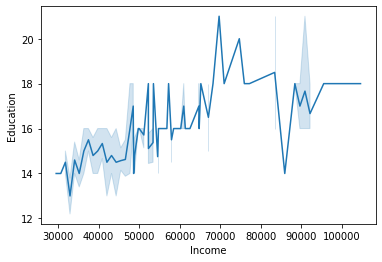

In [ ]:
sns.lineplot(x=df["Income"],y=df["Education"]) #Correlation of income and education given in line plot
plt.show()                                      #which is representing positive trend.

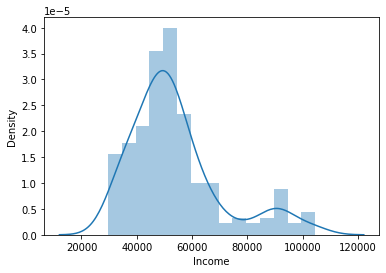

In [ ]:
sns.distplot(df["Income"]) ## Maximum is Income range is between 40,000 and 60,000

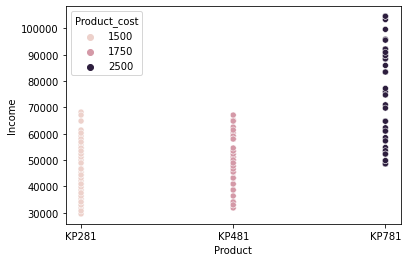

In [ ]:
sns.scatterplot(df["Product"],df["Income"],df["Product_cost"]) # Customer with high Income prefering to buy KP781.
                                                               # KP281 and KP481 selling is almost same.

## **Customer Profiling - Categorization of users**

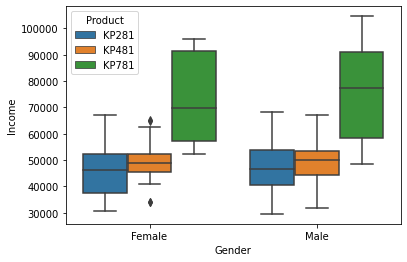

In [ ]:
sns.boxplot(x="Gender",y="Income",hue="Product",data=df) #Only the outlier present for female data in income with KP481
                                                         #In both genders, high-income customers prefer buying KP781

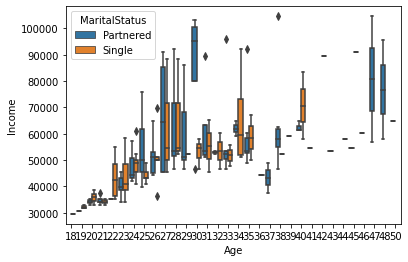

In [ ]:
sns.boxplot(x="Age",y="Income",hue="MaritalStatus",data=df)

#From the graph, we can conclude that Partnered customers are more as compared to single
# hence the target customer should be partnered


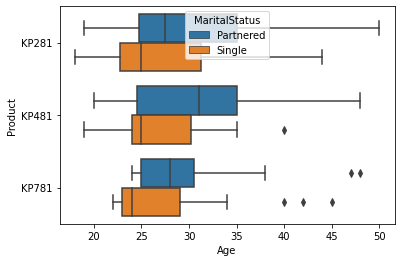

In [ ]:
sns.boxplot(x="Age",y="Product",hue="MaritalStatus",data=df)

## Partnered age range 25-35 buying KP281 and KP481
## Single customer range more than 20 and less than 32 prefered to buy KP281,KP481 and KP781

In [ ]:
pd.crosstab(index=df["MaritalStatus"],columns=df["Product"],margins=True)

Product,KP281,KP481,KP781,All
MaritalStatus,,,,
Partnered,48,36,23,107
Single,32,24,17,73
All,80,60,40,180


In [ ]:
(17/180)*100 ## probability of single using KP781 customer

9.444444444444445

In [ ]:
pd.crosstab(index=df["MaritalStatus"],columns=df["Product"],margins=True,normalize=True)*100

## gives us the probabily of product against maritalstatus

Product,KP281,KP481,KP781,All
MaritalStatus,,,,
Partnered,26.666667,20.000000,12.777778,59.444444
Single,17.777778,13.333333,9.444444,40.555556
All,44.444444,33.333333,22.222222,100.000000


## **Representing the marginal probability like - what percent of customers have purchased KP281, KP481, or KP781 in a table**

In [ ]:
pd.crosstab(index=df["Gender"],columns=df["Product"],margins=True,normalize=True)*100

Product,KP281,KP481,KP781,All
Gender,,,,
Female,22.222222,16.111111,3.888889,42.222222
Male,22.222222,17.222222,18.333333,57.777778
All,44.444444,33.333333,22.222222,100.000000


### The above crosstab gives us that the percentage of customer have purchased product:
### *The percentage of customer have purchased KP281 is 44.44%
###*The percentage of customer have purchased KP481 is 33.33%
### *The percentage of customer have purchased KP781 is 22.22%


In [ ]:
x=df["Product"].value_counts() ## another way tp find the number of custo
x[0]/len(df["Product"])*100


44.44444444444444

## **Marginal Distribution**

In [ ]:
pd.crosstab(index=df["Fitness"],columns=df["Product"],margins=True,normalize=True)*100

# Fitness rating for KP781 is more at excellent category i.e. 5
# KP281 getting fitness rate 3 more that KP481
# KP481 didnot receive a 5 rating it's need improvement in features

Product,KP281,KP481,KP781,All
Fitness,,,,
1,0.555556,0.555556,0.000000,1.111111
2,7.777778,6.666667,0.000000,14.444444
3,30.000000,21.666667,2.222222,53.888889
4,5.000000,4.444444,3.888889,13.333333
5,1.111111,0.000000,16.111111,17.222222
All,44.444444,33.333333,22.222222,100.000000


In [ ]:
pd.crosstab(index=df["Education"],columns=df["Product"],margins=True,normalize=True)*100

# more educated customer prifering to buy KO781
# 14-16 year educated customer prefering to buy KP281
# 14 year and 16 year educated customer prefering to buy KP481


Product,KP281,KP481,KP781,All
Education,,,,
12,1.111111,0.555556,0.000000,1.666667
13,1.666667,1.111111,0.000000,2.777778
14,16.666667,12.777778,1.111111,30.555556
15,2.222222,0.555556,0.000000,2.777778
16,21.666667,17.222222,8.333333,47.222222
18,1.111111,1.111111,10.555556,12.777778
20,0.000000,0.000000,0.555556,0.555556
21,0.000000,0.000000,1.666667,1.666667
All,44.444444,33.333333,22.222222,100.000000


In [ ]:
pd.crosstab(index=df["Age"],columns=df["Product"],margins=True,normalize=True)*100

# the probability of buying KP281 is 44.44% which is distributed all over the ages

Product,KP281,KP481,KP781,All
Age,,,,
18,0.555556,0.000000,0.000000,0.555556
19,1.666667,0.555556,0.000000,2.222222
20,1.111111,1.666667,0.000000,2.777778
21,2.222222,1.666667,0.000000,3.888889
22,2.222222,0.000000,1.666667,3.888889
23,4.444444,3.888889,1.666667,10.000000
24,2.777778,1.666667,2.222222,6.666667
25,3.888889,6.111111,3.888889,13.888889
26,3.888889,1.666667,1.111111,6.666667


## **Checking conditional probability**

**The probability of a male customer buying a KP781 treadmill is 31.730769**

In [ ]:
pd.crosstab(index=df["Gender"],columns=df["Product"],margins=True,normalize='index',dropna=True)*100

## KP281 treadmill are use by female(52.38) more than males probability of buying KP281 for both the gender
## is heigher (44.44) than another 2 treadmills.
## The probability of a male customer buying a KP781 treadmill is 31.730769

Product,KP281,KP481,KP781
Gender,,,
Female,52.631579,38.157895,9.210526
Male,38.461538,29.807692,31.730769
All,44.444444,33.333333,22.222222


In [ ]:
pd.crosstab(index=df["Gender"],columns=df["Product"],margins=True,normalize='columns',dropna=True)*100
## KP481 has height probability for female gender
## KP781 has height probability for male gender

Product,KP281,KP481,KP781,All
Gender,,,,
Female,50.0,48.333333,17.5,42.222222
Male,50.0,51.666667,82.5,57.777778


In [ ]:
pd.crosstab(index=df["MaritalStatus"],columns=df["Product"],margins=True,normalize='columns',dropna=True)*100

## probability of buying KP281 and KP481 is same for partnered.
## probability of buying KP781 is maximum for single


Product,KP281,KP481,KP781,All
MaritalStatus,,,,
Partnered,60.0,60.0,57.5,59.444444
Single,40.0,40.0,42.5,40.555556


In [ ]:
pd.crosstab(index=df["Fitness"],columns=df["Product"],margins=True,normalize='columns',dropna=True)*100

## Probability of getting 5 fitness rating for KP781 is maximum

Product,KP281,KP481,KP781,All
Fitness,,,,
1,1.25,1.666667,0.0,1.111111
2,17.50,20.000000,0.0,14.444444
3,67.50,65.000000,10.0,53.888889
4,11.25,13.333333,17.5,13.333333
5,2.50,0.000000,72.5,17.222222


# **Recommendations and actionable insights, based on the inferences**

### **1] Maximum selling product is KP281 tredmill. maximum customer are from male category and maximum customer are partnered.**

### **2] As Aerofit's slogan is Fitless to fitness similarly we also need to move the fitness rating from 3 to 5 for KP281 and KP481 although the selling percentage of KP281 and KP481 is heighest. Aerofit has to add some more features to increase the ratings to these both treadmill.**

### **3] Higher educated customers and that too with higher income usually buy the KP781 treadmill whose cost is the highest so for such higher educated customers we can directly introduce the KP781 treadmill rather than KP281 or Kp481 in order to increase the profit.**

### **4] Male customers or buyers are double in range as compared to females. so target male customers more to increase the product selling.**

### **5] Partnered customers are more than single customers so aerofit can offer some discounts for the partnered customer in order to increase the sales of products and most probably partnered customers prefer to buy KP281 and KP481.**

###**6] Annual income more than 45000 (in $) customer preferring to buy KP781 treadmill.**

###**7] Annual income range from 25000 to 70000 preferred to buy KP281 and range from 30000 to 70000 (in $) preferred to buy KP481 and its selling is almost the same.**

###**8] Customer age to target is from approximately 20-35 years old.**

###**9] The average number of times the customer plans to use the treadmill each week is 4 times/week for males and 3 times/week for females.**

###**10] The maximum average number of miles the customer expects to walk/run each week is lie between 45 - 120 miles**

In [ ]:
(3**100) % 17



13

In [ ]:
(3**7) % 17

11

In [ ]:
(3**6) %17

15

In [ ]:
4%2

0

In [ ]:
list1=[1,2,3,4,5]
list2=[i%5 for i in list1]
list2

[1, 2, 3, 4, 0]